**Step 1 훈련 세트와 테스트 세트 만들기**

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# CSV 파일 불러오기
data = pd.read_csv('waterQuality1.csv')

# 데이터 확인
data.head()



,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [2]:
data.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [3]:
print(data.dtypes)

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object


In [4]:
# type 변환
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['is_safe'] = pd.to_numeric(data['is_safe'], errors='coerce')
print(data.dtypes)

data.dropna(inplace=True)

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe        float64
dtype: object


In [5]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# 특성과 타겟 변수 분리
X = data.drop('is_safe', axis=1)  # 'is_safe' 열 제외한 모든 열 -특성
y = data['is_safe']              # 'is_safe' 타겟 변수

# 훈련 세트, 테스트 세트 분할 (80-20 비율 사용)
# random_state = 42 : 랜덤 시드 설정 (이 시드를 사용하여 데이터 분할 시, 동일한 코드를 다시 실행할 때마다 동일한 분할 결과 얻을 수 있음)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((6396, 20), (1600, 20), (6396,), (1600,))

In [6]:
# 데이터 피처들의 기초 통계량 계산
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


**Step 2 데이터 탐색 및 시각화**

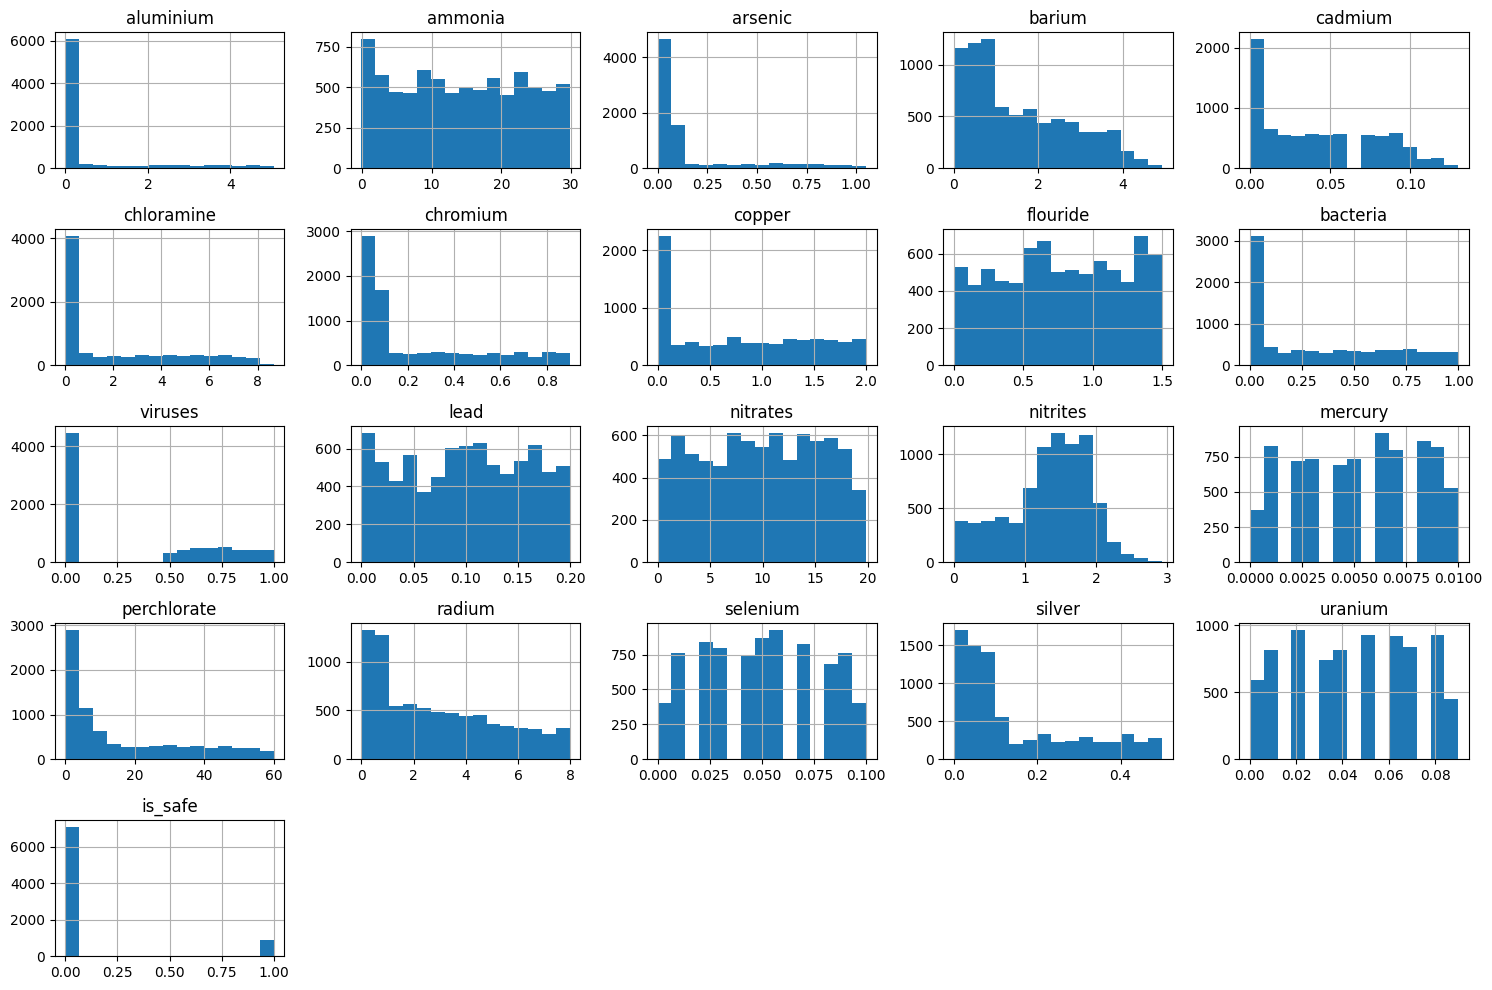

In [7]:
# 히스토그램 시각화
def plot_histograms(dataframe):
    dataframe.hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.show()
    
plot_histograms(data)

<Figure size 1500x1000 with 0 Axes>

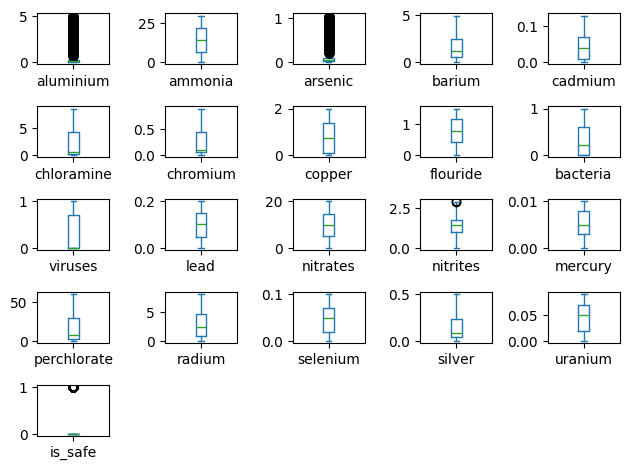

In [8]:
# 상자 그림(Box Plot) 시각화
def plot_boxplots(dataframe):
    plt.figure(figsize=(15, 10))
    dataframe.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()

plot_boxplots(data)

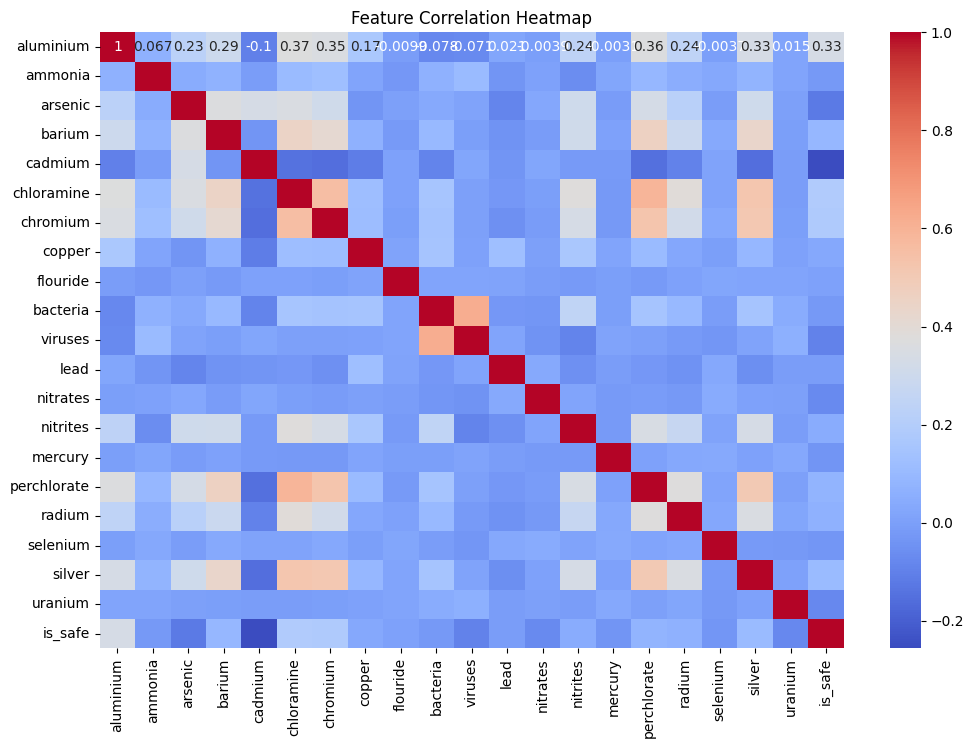

In [9]:
# 피처 간 상관 관계 시각화 (히트맵)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Step 3 데이터 전처리**

In [10]:
# 결측치 없음
# 범주형 데이터 없음

# 이상치 확인
print(data)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.

In [11]:
# 아무리 정화를 잘해도 물에 각 성분이 0이기는 어려움
# 0인 값을 이상치로 분류하고 중간값으로 정제
# is_safe는 0과 1로 이루어져 있는 데이터이므로 건드리지 않음
data.iloc[:, :-1] = data.iloc[:, :-1].replace(0, data.iloc[:, :-1].median())

In [12]:
# 이상치 처리 결과
# 0값이 중간값으로 변경됨
print(data)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.05    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.05    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.040        2.00      0.09   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.

In [13]:
# true와 false 값으로 이루어진 is_safe를 제외한 피처들이 저장된 데이터 프레임 생성
# 숫자형 데이터만 가공하기 위함
num_features = data.drop('is_safe', axis=1)

**Step 4 데이터 스케일링**

In [14]:
#편향된 피처 리스트
skewed_features = ['aluminium', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'bacteria', 'viruses', 'perchlorate', 'radium', 'silver']

# 편향된 피처를 로그 변환하는 사용자 정의 변환기
def apply_log_transform(df, feature_list):
    for feature in feature_list:
        df[feature] = np.log(df[feature])

# 로그 변환 적용
apply_log_transform(num_features, skewed_features)

In [15]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 적용하여 균일한 분포로 변환
# 균일한 분포는 서로 다른 스케일을 가진 피처들을 균일한 척도로 비교할 수 있게끔 함
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(num_features)

# 스케일러가 적용된 값으로 num_features 초기화
num_features = pd.DataFrame(scaled_features, columns=num_features.columns)

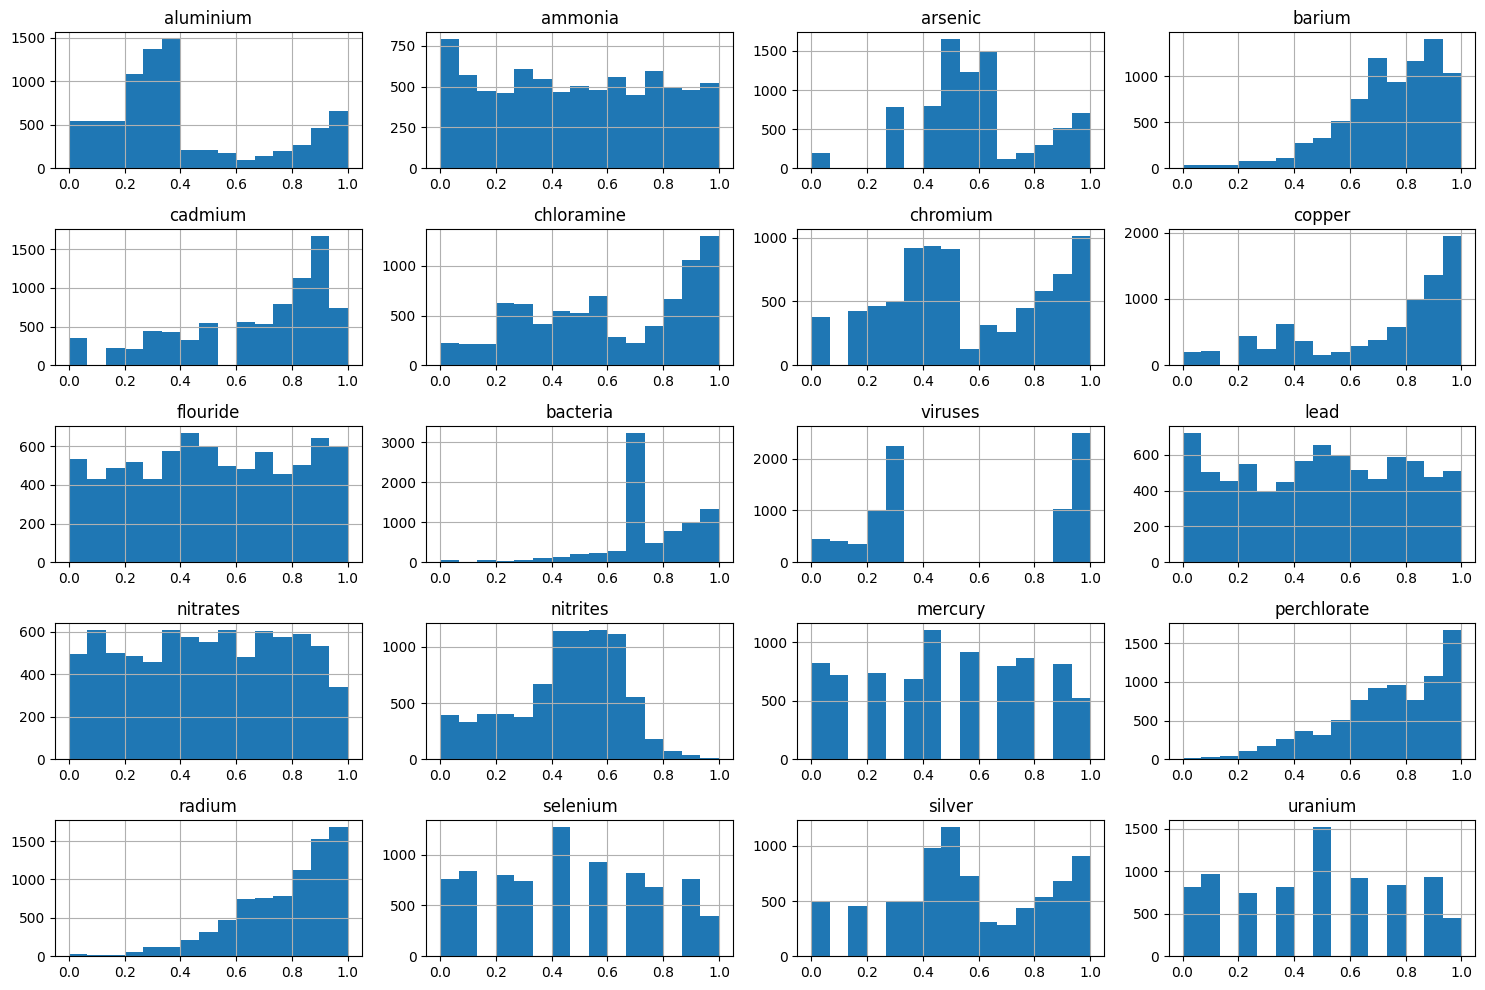

In [16]:
plot_histograms(num_features)

**Step 5 파이프라인 구성**

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

# 이상치 처리를 위한 사용자 정의 변환기
class ZeroToMedianTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.medians = pd.DataFrame([X.median()]).iloc[0]
        return self
    
    def transform(self, X, y=None):
        return X.replace(0, self.medians)

In [18]:
#로그 변환을 위한 함수
def log_transform(x):
    return np.log(x + 1)  # log(0)을 방지하기 위해 1을 더함

#로그 변환 적용을 위한 변환기
log_transformer = FunctionTransformer(log_transform, validate=False)

minmax_scaler = MinMaxScaler()

In [19]:
# 전체 피처에 대한 파이프라인 동작 구조
# 각각의 변환기를 적절한 피처에 적용. 이상치 처리, 로그 변환, 스케일링이 각각의 피처에 적용됨
preprocessing_pipeline = ColumnTransformer([
    ('zero_to_median', ZeroToMedianTransformer(), num_features.columns),
    ('log_transform', log_transformer, skewed_features),
    ('minmax_scaler', minmax_scaler, num_features.columns)
], remainder='passthrough')

integrated_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline)
])

# 파이프라인 구조 출력
integrated_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('zero_to_median',
                                                  ZeroToMedianTransformer(),
                                                  Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      d...
                                                   'chloramine', 'chromium',
                                                   'copper', 'bacteria',
                                                   'viruses', 'perchlorate',
                                                   'radium', 'silver']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object'))]))])

**Step 6 모델 선택 및 훈련**

In [20]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, accuracy_score, precision_score, recall_score, f1_score

def test_model(y_test_fold, y_pred_fold):
    # MSE 및 RMSE 계산
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    rmse_fold = np.sqrt(mse_fold)

    # 정확도, 정밀도, 재현율, F1 스코어 계산
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    precision_fold = precision_score(y_test_fold, y_pred_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    f1_fold = f1_score(y_test_fold, y_pred_fold)

    # 결과를 데이터프레임으로 변환
    result_df = pd.DataFrame({
        'MSE': [mse_fold],
        'RMSE': [rmse_fold],
        '정확도': [accuracy_fold],
        '정밀도': [precision_fold],
        '재현율': [recall_fold],
        'F1 스코어': [f1_fold]
    })

    return result_df

def result_visualization(results_df):
    # 결과를 지표별로 그래프로 나타내기
    plt.figure(figsize=(12, 8))
    plt.rcParams['font.family'] = 'Malgun Gothic'
    for i, metric in enumerate(results_df.columns):
        plt.subplot(3, 2, i+1)
        sns.barplot(x=results_df.index+1, y=metric, data=results_df)
        plt.title(f'각 폴드에서의 {metric}')
        plt.xticks(range(0, len(results_df)))  # x 축 눈금 설정

    plt.tight_layout()
    plt.show()

In [21]:
from sklearn.model_selection import cross_val_predict, KFold

# K-폴드를 4개로 설정
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

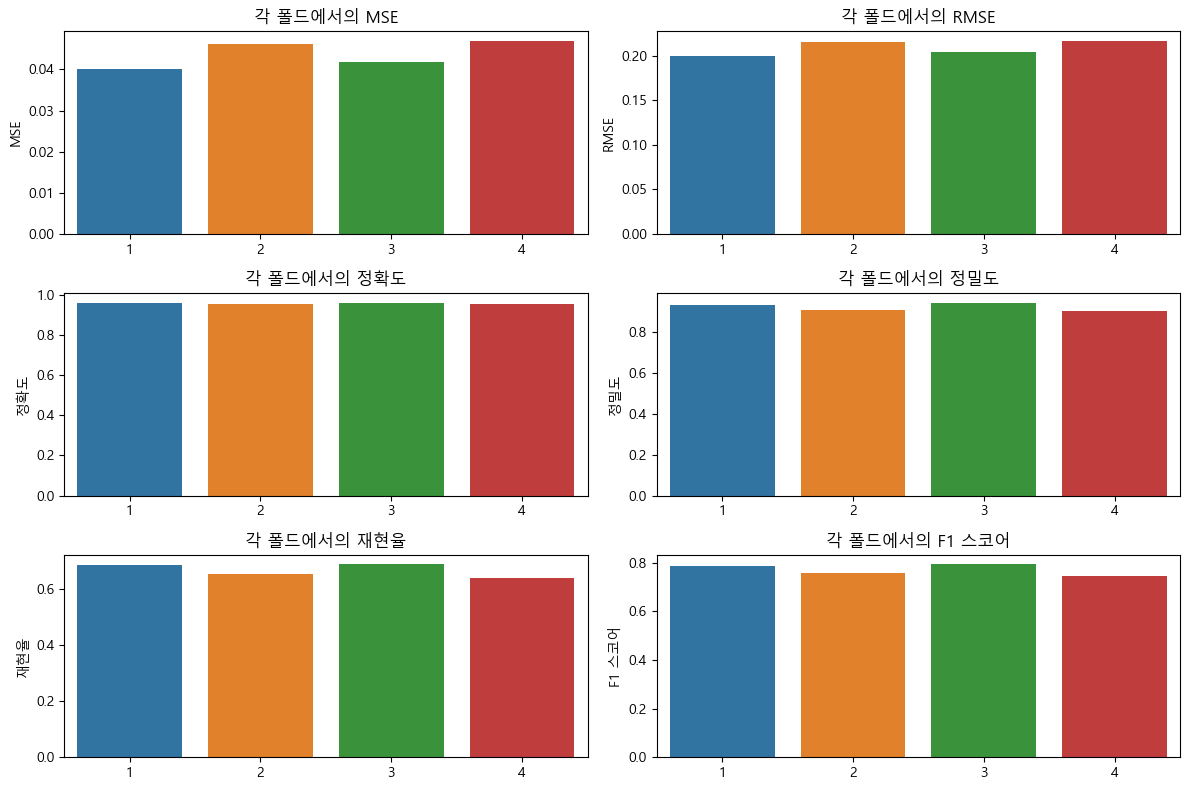

전체 MSE 평균: 0.04377736085053158
전체 RMSE 평균: 0.20911493411053841
전체 정확도 평균: 0.9562226391494684
전체 정밀도 평균: 0.9196572604865175
전체 재현율 평균: 0.6639436702922232
전체 F1 스코어 평균: 0.7711113667544376


In [83]:
from sklearn.ensemble import RandomForestClassifier

rand_forest_calssifier = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', RandomForestClassifier())
])

# k-폴드 결과값을 저장할 변수
results = []

# K-폴드에 대한 루프
for fold_index, (train_index, test_index) in enumerate(kfold.split(X_train), 1):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # 모델 훈련
    rand_forest_calssifier.fit(X_train_fold, y_train_fold)

    # 각 폴드에서의 예측값
    y_pred_fold = rand_forest_calssifier.predict(X_test_fold)

    # 각 폴드에서의 결과 저장
    fold_result = test_model(y_test_fold, y_pred_fold)
    results.append(fold_result)

# 결과 시각화를 위해 데이터프레임으로 변환
results_rand_forest_df = pd.concat(results, ignore_index=True)

# 각 결과 시각화
result_visualization(results_rand_forest_df)

# 전체 폴드에 대한 결과 출력
for metric in results[0].columns:
    metric_values = [result[metric].values[0] for result in results]
    print(f'전체 {metric} 평균: {np.mean(metric_values)}')

C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

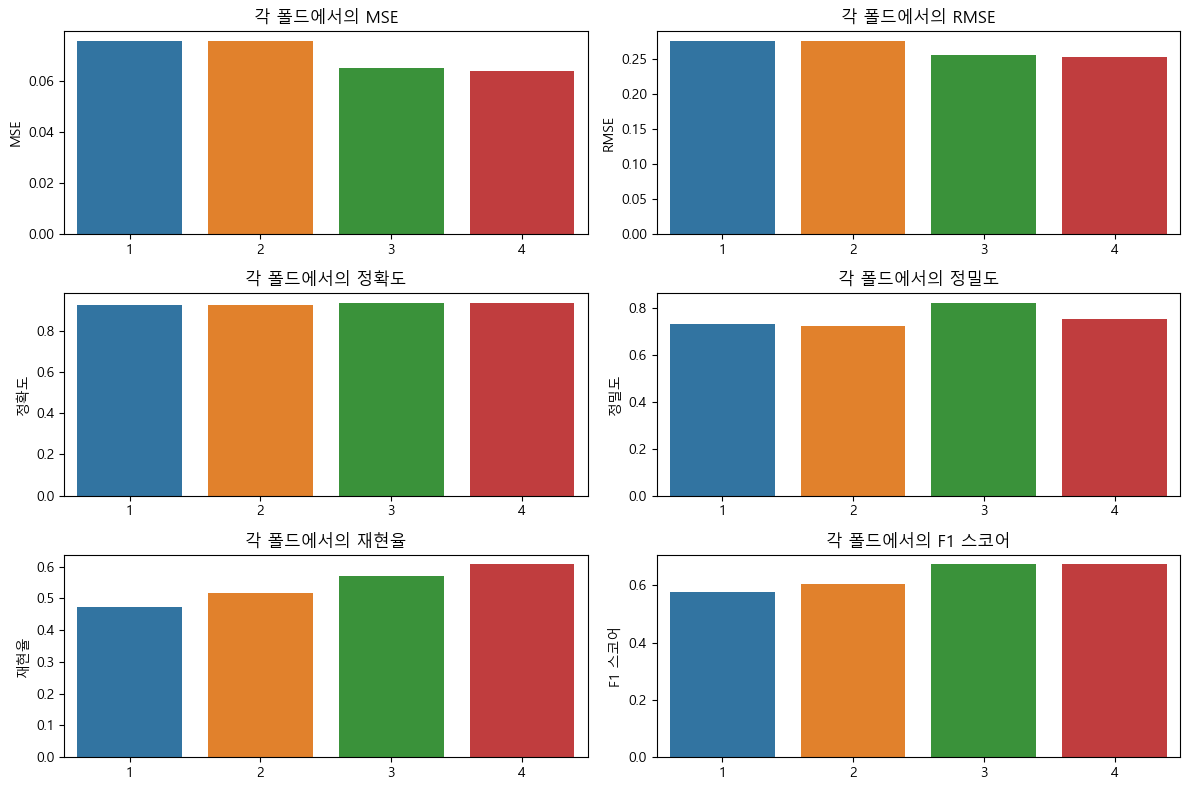

전체 MSE 평균: 0.07004377736085055
전체 RMSE 평균: 0.2644423009199687
전체 정확도 평균: 0.9299562226391495
전체 정밀도 평균: 0.7587562281229787
전체 재현율 평균: 0.541731931061453
전체 F1 스코어 평균: 0.6311875457338771


In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_classifier = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', AdaBoostClassifier())
])

# k-폴드 결과값을 저장할 변수
results = []

# K-폴드에 대한 루프
for fold_index, (train_index, test_index) in enumerate(kfold.split(X_train), 1):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # 모델 훈련
    ada_boost_classifier.fit(X_train_fold, y_train_fold)

    # 각 폴드에서의 예측값
    y_pred_fold = ada_boost_classifier.predict(X_test_fold)

    # 각 폴드에서의 결과 저장
    fold_result = test_model(y_test_fold, y_pred_fold)
    results.append(fold_result)

# 결과 시각화를 위해 데이터프레임으로 변환
results_ada_df = pd.concat(results, ignore_index=True)

# 각 결과 시각화
result_visualization(results_ada_df)

# 전체 폴드에 대한 결과 출력
for metric in results[0].columns:
    metric_values = [result[metric].values[0] for result in results]
    print(f'전체 {metric} 평균: {np.mean(metric_values)}')

C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

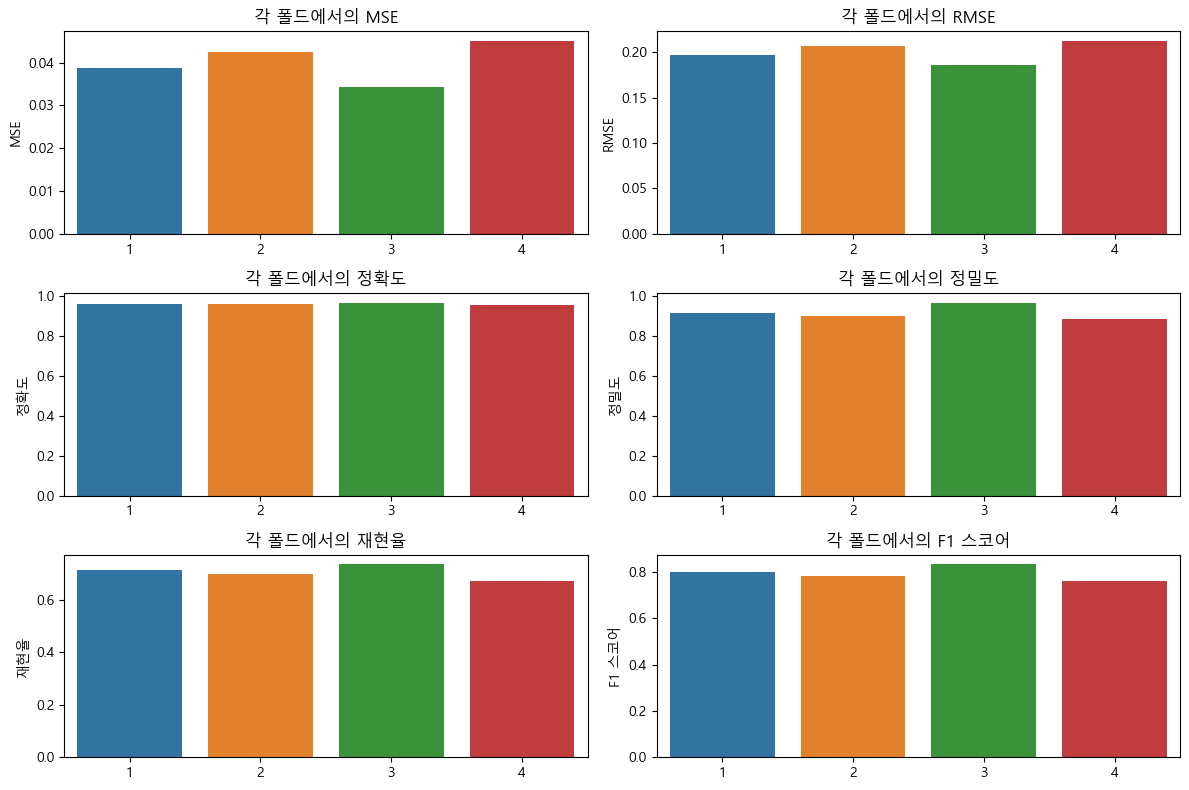

전체 MSE 평균: 0.04018136335209506
전체 RMSE 평균: 0.2001981903789852
전체 정확도 평균: 0.959818636647905
전체 정밀도 평균: 0.915048245997466
전체 재현율 평균: 0.7030436642120115
전체 F1 스코어 평균: 0.7951265445066155


In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_classifier = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', GradientBoostingClassifier())
])

# k-폴드 결과값을 저장할 변수
results = []

# K-폴드에 대한 루프
for fold_index, (train_index, test_index) in enumerate(kfold.split(X_train), 1):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # 모델 훈련
    gradient_boosting_classifier.fit(X_train_fold, y_train_fold)

    # 각 폴드에서의 예측값
    y_pred_fold = gradient_boosting_classifier.predict(X_test_fold)

    # 각 폴드에서의 결과 저장
    fold_result = test_model(y_test_fold, y_pred_fold)
    results.append(fold_result)

# 결과 시각화를 위해 데이터프레임으로 변환
results_gradient_df = pd.concat(results, ignore_index=True)

# 각 결과 시각화
result_visualization(results_gradient_df)

# 전체 폴드에 대한 결과 출력
for metric in results[0].columns:
    metric_values = [result[metric].values[0] for result in results]
    print(f'전체 {metric} 평균: {np.mean(metric_values)}')

C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

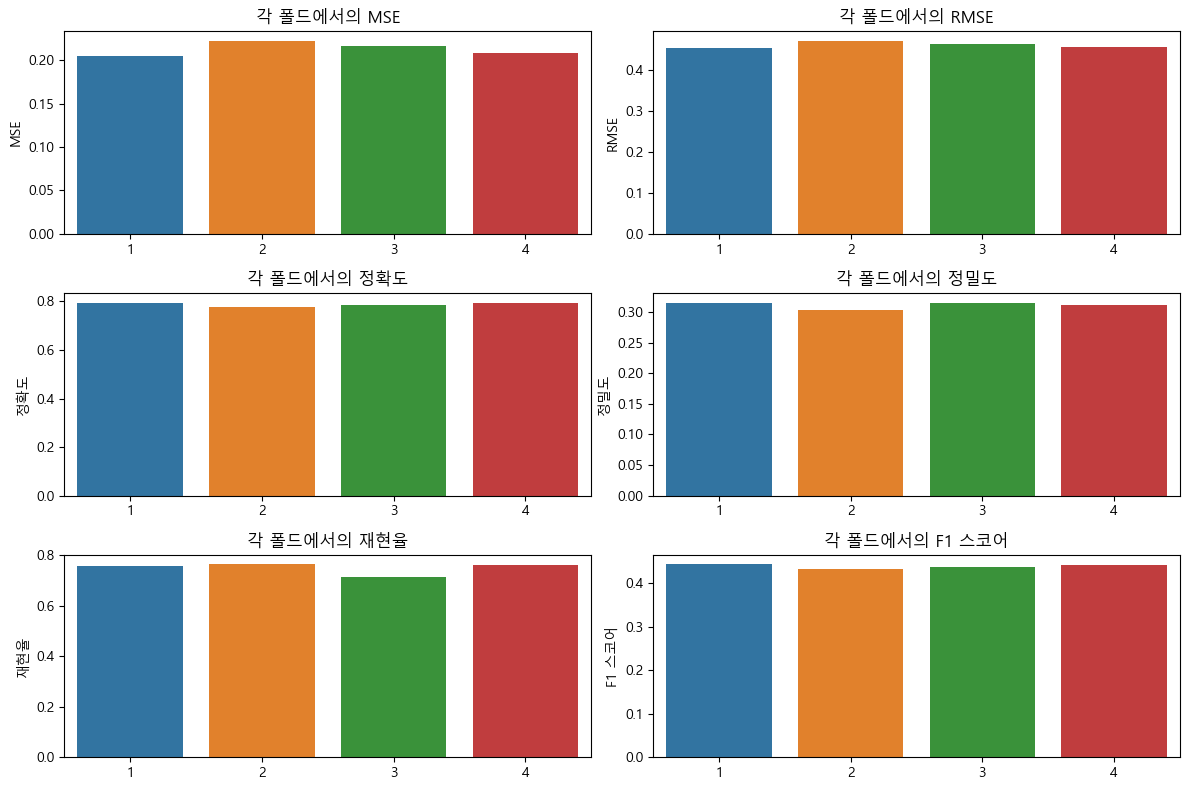

전체 MSE 평균: 0.21278924327704815
전체 RMSE 평균: 0.4612358910542349
전체 정확도 평균: 0.7872107567229518
전체 정밀도 평균: 0.31091471908976553
전체 재현율 평균: 0.7492605287849664
전체 F1 스코어 평균: 0.43932119534061825


In [28]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', GaussianNB())
])

 # k-폴드 결과값을 저장할 변수
results = []

# K-폴드에 대한 루프
for fold_index, (train_index, test_index) in enumerate(kfold.split(X_train), 1):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # 모델 훈련
    naive_bayes_classifier.fit(X_train_fold, y_train_fold)

    # 각 폴드에서의 예측값
    y_pred_fold = naive_bayes_classifier.predict(X_test_fold)

    # 각 폴드에서의 결과 저장
    fold_result = test_model(y_test_fold, y_pred_fold)
    results.append(fold_result)

# 결과 시각화를 위해 데이터프레임으로 변환
results_naive_bayes_df = pd.concat(results, ignore_index=True)

# 각 결과 시각화
result_visualization(results_naive_bayes_df)

# 전체 폴드에 대한 결과 출력
for metric in results[0].columns:
    metric_values = [result[metric].values[0] for result in results]
    print(f'전체 {metric} 평균: {np.mean(metric_values)}')

C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\오동엽\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

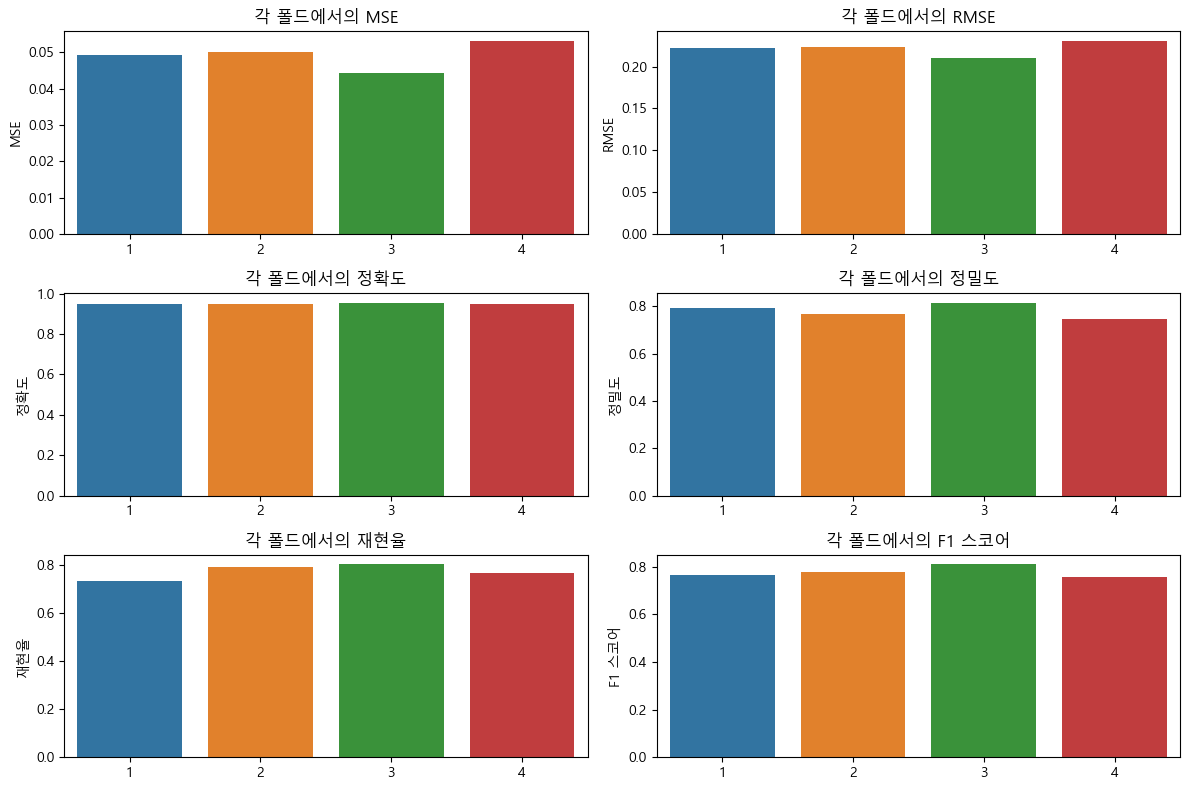

전체 MSE 평균: 0.04924953095684803
전체 RMSE 평균: 0.22180782926664205
전체 정확도 평균: 0.950750469043152
전체 정밀도 평균: 0.7808653938195645
전체 재현율 평균: 0.7745541235581953
전체 F1 스코어 평균: 0.7773136299975576


In [26]:
from sklearn.tree import DecisionTreeClassifier

decison_tree_classifier = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', DecisionTreeClassifier())
])
 # k-폴드 결과값을 저장할 변수
results = []

# K-폴드에 대한 루프
for fold_index, (train_index, test_index) in enumerate(kfold.split(X_train), 1):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # 모델 훈련
    decison_tree_classifier.fit(X_train_fold, y_train_fold)

    # 각 폴드에서의 예측값
    y_pred_fold = decison_tree_classifier.predict(X_test_fold)

    # 각 폴드에서의 결과 저장
    fold_result = test_model(y_test_fold, y_pred_fold)
    results.append(fold_result)

# 결과 시각화를 위해 데이터프레임으로 변환
results_decison_tree_df = pd.concat(results, ignore_index=True)

# 각 결과 시각화
result_visualization(results_decison_tree_df)

# 전체 폴드에 대한 결과 출력
for metric in results[0].columns:
    metric_values = [result[metric].values[0] for result in results]
    print(f'전체 {metric} 평균: {np.mean(metric_values)}')

**Step 7 모델 세부 튜닝**

In [78]:
#GridSerchCV
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier의 하이퍼파라미터 튜닝
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rand_forest_calssifier, param_grid_rf, cv=kfold, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('zero_to_median',
                                                                         ZeroToMedianTransformer(),
                                                                         Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'ni...
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# RandomizedSearchCV를 사용하여 랜덤 서치 진행
random_search_rf = RandomizedSearchCV(rand_forest_calssifier, param_distributions=param_grid_rf, 
                                      n_iter=10, cv=kfold, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train, y_train)



RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('zero_to_median',
                                                                               ZeroToMedianTransformer(),
                                                                               Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrate...
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object'))])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   param_distributions={'classifier__max_depth': [None, 10, 20,
                                                                  30],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     200]},
                   random_state=42, scoring='accuracy')

**Step 8 결과와 결론**

In [80]:
# RandomForestClassifier
# GridSearchCV 최적의 하이퍼파라미터 출력
estimator_rf = grid_search_rf.best_estimator_
pred_rf = estimator_rf.predict(X_test) #estimator.predict(test)

print("### RandomForestClassifier \n최적 하이퍼파라미터:\n", grid_search_rf.best_params_)
print('최고 예측 정확도: {0:.4f}\n'.format(grid_search_rf.best_score_))
test_model(y_test, pred_rf)

### RandomForestClassifier 
최적 하이퍼파라미터:
 {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
최고 예측 정확도: 0.9590



,MSE,RMSE,정확도,정밀도,재현율,F1 스코어
0,0.0375,0.193649,0.9625,0.960526,0.73,0.829545


In [77]:
# RandomForestClassifier
# RandomizedSearchCV 최적의 하이퍼파라미터 출력
estimator_rf_rs = random_search_rf.best_estimator_
pred_rf_rs = estimator_rf_rs.predict(X_test) #estimator.predict(test)

print("### RandomForestClassifier \n최적 하이퍼파라미터:\n", random_search_rf.best_params_)
print('최고 예측 정확도: {0:.4f}\n'.format(random_search_rf.best_score_))
test_model(y_test, pred_rf_rs)

### RandomForestClassifier 
최적 하이퍼파라미터:
 {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}
최고 예측 정확도: 0.9604



,MSE,RMSE,정확도,정밀도,재현율,F1 스코어
0,0.040625,0.201556,0.959375,0.941176,0.72,0.815864
